In [ ]:
!pip install pandas

In [ ]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import vpython as vs
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix

C:\Users\sabba\AppData\Local\Temp\ipykernel_13780\870798358.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<IPython.core.display.Javascript object>

In [3]:
!pip install pandas

In [4]:
pureData = pd.read_csv("C:/Users/sabba/OneDrive/Desktop/Python/benign_traffic.csv")
print("Non-malicious Dataset")
display(pureData.head())
maliciousDataset = pd.read_csv("C:/Users/sabba/OneDrive/Desktop/Python/junk.csv")
print("Malicious Dataset")
display(maliciousDataset.head())

Non-malicious Dataset


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,34.095047,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,100.081513,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0


Malicious Dataset


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,34.095047,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,100.081513,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0


In [5]:
print("There are %d records with %d features in non-malicious dataset"%(pureData.shape[0],pureData.shape[1]))
display(pureData.describe())
print("There are %d records with %d features in malicious dataset"%(maliciousDataset.shape[0],maliciousDataset.shape[1]))
display(maliciousDataset.describe())

There are 49548 records with 115 features in non-malicious dataset


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,49548.000000,49548.000000,4.954800e+04,49548.000000,49548.000000,4.954800e+04,49548.000000,49548.000000,49548.000000,49548.000000,...,4.954800e+04,4.954800e+04,49548.000000,49548.000000,49548.000000,4.954800e+04,49548.000000,4.954800e+04,4.954800e+04,4.954800e+04
mean,2.256231,92.387127,1.989736e+01,2.288308,92.382667,2.549500e+01,2.422229,92.829655,67.670150,4.291791,...,8.968526e+00,1.806003e+00,0.000371,4.861666,92.338129,1.392164e-01,130.175018,9.643987e+00,2.138594e+00,1.775780e-03
std,1.453213,17.640932,3.591753e+02,1.469317,17.455677,3.770187e+02,1.505076,15.858976,436.114015,1.644405,...,2.919997e+02,7.661357e+01,0.013878,1.244585,17.928385,1.812241e+00,25.106333,2.914718e+02,8.120645e+01,2.521668e-02
min,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,-7.291934e+02,-0.142042,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,-6.899823e+02,-1.353522e-01
25%,1.000000,97.999999,0.000000e+00,1.000029,97.976892,1.820000e-12,1.031097,93.553006,0.000808,2.878704,...,4.550000e-13,-1.780000e-35,0.000000,4.219096,98.000000,6.740000e-07,138.592929,1.820000e-12,-4.650000e-29,-7.242500e-18
50%,1.951958,101.999737,5.410000e-08,1.984559,101.985794,3.430290e-04,1.999986,101.337645,1.160150,4.241541,...,1.820000e-12,1.515000e-85,0.000000,4.220188,102.000000,1.350000e-06,144.249783,3.640000e-12,1.530000e-30,0.000000e+00
75%,3.121032,102.000000,2.594240e-04,3.398511,102.000000,1.687128e-01,3.969432,101.999583,42.268658,5.602002,...,3.640000e-12,3.950000e-34,0.000000,5.308375,102.000000,1.910000e-06,144.249783,5.140000e-12,7.530000e-29,2.000000e-17
max,8.837730,360.458980,2.123254e+04,10.876876,360.275733,2.138792e+04,14.488665,360.091968,20362.325690,20.148226,...,1.088123e+04,4.381892e+03,0.767997,11.283089,354.000000,5.890428e+01,688.052324,1.088186e+04,4.393551e+03,7.754023e-01


There are 49548 records with 115 features in malicious dataset


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,49548.000000,49548.000000,4.954800e+04,49548.000000,49548.000000,4.954800e+04,49548.000000,49548.000000,49548.000000,49548.000000,...,4.954800e+04,4.954800e+04,49548.000000,49548.000000,49548.000000,4.954800e+04,49548.000000,4.954800e+04,4.954800e+04,4.954800e+04
mean,2.256231,92.387127,1.989736e+01,2.288308,92.382667,2.549500e+01,2.422229,92.829655,67.670150,4.291791,...,8.968526e+00,1.806003e+00,0.000371,4.861666,92.338129,1.392164e-01,130.175018,9.643987e+00,2.138594e+00,1.775780e-03
std,1.453213,17.640932,3.591753e+02,1.469317,17.455677,3.770187e+02,1.505076,15.858976,436.114015,1.644405,...,2.919997e+02,7.661357e+01,0.013878,1.244585,17.928385,1.812241e+00,25.106333,2.914718e+02,8.120645e+01,2.521668e-02
min,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,-7.291934e+02,-0.142042,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,-6.899823e+02,-1.353522e-01
25%,1.000000,97.999999,0.000000e+00,1.000029,97.976892,1.820000e-12,1.031097,93.553006,0.000808,2.878704,...,4.550000e-13,-1.780000e-35,0.000000,4.219096,98.000000,6.740000e-07,138.592929,1.820000e-12,-4.650000e-29,-7.242500e-18
50%,1.951958,101.999737,5.410000e-08,1.984559,101.985794,3.430290e-04,1.999986,101.337645,1.160150,4.241541,...,1.820000e-12,1.515000e-85,0.000000,4.220188,102.000000,1.350000e-06,144.249783,3.640000e-12,1.530000e-30,0.000000e+00
75%,3.121032,102.000000,2.594240e-04,3.398511,102.000000,1.687128e-01,3.969432,101.999583,42.268658,5.602002,...,3.640000e-12,3.950000e-34,0.000000,5.308375,102.000000,1.910000e-06,144.249783,5.140000e-12,7.530000e-29,2.000000e-17
max,8.837730,360.458980,2.123254e+04,10.876876,360.275733,2.138792e+04,14.488665,360.091968,20362.325690,20.148226,...,1.088123e+04,4.381892e+03,0.767997,11.283089,354.000000,5.890428e+01,688.052324,1.088186e+04,4.393551e+03,7.754023e-01


In [6]:
print("Adding output column in the datasets with all 0 in pureData dataset and all 1 in maliciousDataset dataset")
pureData["output"] = 0
maliciousDataset["output"] = 1

Adding output column in the datasets with all 0 in pureData dataset and all 1 in maliciousDataset dataset


In [7]:
dataset = pd.concat([pureData, maliciousDataset], axis=0)
print("There are %d records with %d features in combined dataset"%(dataset.shape[0],dataset.shape[1]))

There are 99096 records with 116 features in combined dataset


In [8]:
Output = dataset.output
Input = dataset.loc[:,"MI_dir_L5_weight":"HpHp_L0.01_pcc"]
print("Output shape :-",Output.shape)
print("Intput shape :-",Input.shape)

Output shape :- (99096,)
Intput shape :- (99096, 115)


In [9]:
Output=np.array(Output).flatten()

In [10]:
print("Calculation Z-score normalization which converts all indicators to a common scale with an average of zero and standard deviation of one. The average of zero means that it avoids introducing aggregation distortions stemming from differences in indicators means.")
dataset_numeric = dataset.apply(pd.to_numeric, errors='coerce')
dataset_numeric = dataset_numeric.dropna()
dataset_normalized = (dataset_numeric - dataset_numeric.mean()) / dataset_numeric.std()
dataset_normalized_array = np.array(dataset_normalized)

print("Data after normalization:")
print(dataset_normalized.head())

Calculation Z-score normalization which converts all indicators to a common scale with an average of zero and standard deviation of one. The average of zero means that it avoids introducing aggregation distortions stemming from differences in indicators means.
Data after normalization:
   MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0         -0.864456       -1.835917           -0.055398         -0.876812   
1         -0.864456       14.829953           -0.055398         -0.876812   
2         -0.274120       15.196091            0.044246         -0.256025   
3         -0.864456       13.866281           -0.055398         -0.876812   
4         -0.396371        4.520974           51.416794         -0.336708   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       -1.855146           -0.067623         -0.944960       -2.070110   
1       14.987597           -0.067623         -0.944960       16.468381   
2       15.347122        

In [11]:
X_train, X_test, y_train, y_test = train_test_split(dataset_normalized_array, Output, test_size = 0.2, random_state = 3)
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 79276 samples.
Testing set has 19820 samples.


In [12]:
SVM = SVC(probability=True)
RF = RandomForestClassifier(n_estimators=1500)

In [13]:
def train_predict(model, X_train, y_train, X_test, y_test): 
 model.fit(X_train, y_train)
 
 y_pred = model.predict(X_test)
 
 acc_test = accuracy_score(y_test,y_pred)
 report = classification_report(y_test,y_pred)
 return acc_test,report

In [17]:
SVM_acc,SVM_report = train_predict(SVM,X_train,y_train,X_test,y_test)
print("The accuracy score of SVM is %f"%SVM_acc)
print("Classification report :-")
print(SVM_report)
RF_acc,RF_report = train_predict(RF,X_train,y_train,X_test,y_test)
print("The accuracy score of Random Forest Classifier is %f"%RF_acc)
print("Classification report :-")
print(RF_report)

The accuracy score of SVM is 0.995358
Classification report :-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9927
           1       1.00      1.00      1.00      9893

    accuracy                           1.00     19820
   macro avg       1.00      1.00      1.00     19820
weighted avg       1.00      1.00      1.00     19820

The accuracy score of Random Forest Classifier is 1.000000
Classification report :-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9927
           1       1.00      1.00      1.00      9893

    accuracy                           1.00     19820
   macro avg       1.00      1.00      1.00     19820
weighted avg       1.00      1.00      1.00     19820



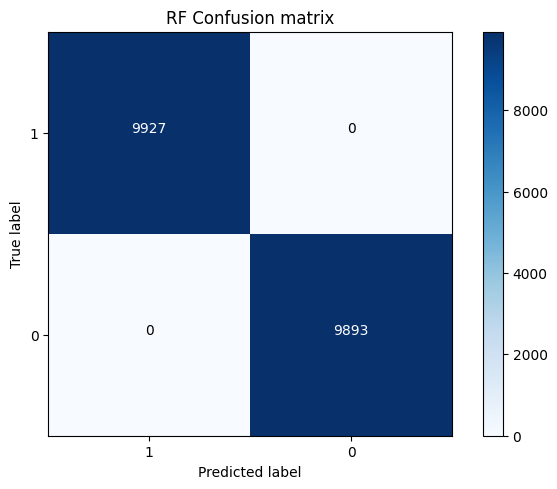

In [31]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

# Now the model is fitted, and you can use it to make predictions
cnf_matrix_rf = confusion_matrix(y_test, RF.predict(X_test))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_rf, classes=[1, 0], title='RF Confusion matrix')
plt.show()

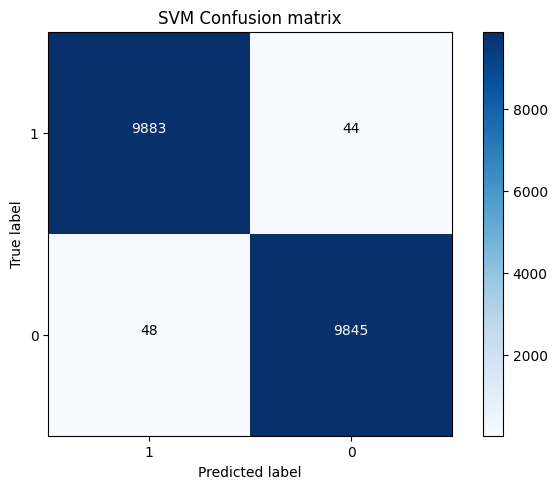

In [33]:
SVM = SVC()
SVM.fit(X_train, y_train)

# Now the SVM model is fitted, and you can use it to make predictions
cnf_matrix_svm = confusion_matrix(y_test, SVM.predict(X_test))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix_svm, classes=[1, 0], title='SVM Confusion matrix')
plt.show()